This notebook is derived from the other notebook "EDA and ALL Models" and is built for the purpose of automating the clustering process, and running the best model chosen from the previous notebook.

## Imports and pre-processing

In [10]:
!pip install kmodes
!pip install kneed

In [11]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

In [12]:
#Loading Data
df_main = pd.read_csv("Data Scientist-Practical Test 1-Customer Demographics Appendix.csv")

#Dropping null rows and AGE=0 rows
df_main = df_main.dropna().reset_index(drop=True)
df_main = df_main[df_main["AGE"] != 0].reset_index(drop=True)

df_main

,AGE,OccupationCategory,AnnualIncome,Category
0,18,OTHERS,BELOW $30 K,ACTIVE
1,18,STUDENTS/NATIONAL SERVICE,BELOW $30 K,ACTIVE
2,19,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,ACTIVE
3,19,DISTRIBUTION/ADMIN/MARKETING/HR,BELOW $30 K,ACTIVE
4,19,OTHERS,$100 K TO $300 K,ACTIVE
...,...,...,...,...
5513,96,RETIREE/UNEMPLOYED,BELOW $30 K,ACTIVE
5514,97,HOME MAKERS,BELOW $30 K,VERY ACTIVE
5515,98,HOME MAKERS,BELOW $30 K,ACTIVE
5516,111,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE


## KPrototype


In [13]:
#Scaling the AGE column
df_kproto = df_main.copy()
df_kproto["AGE"] = StandardScaler().fit_transform(df_kproto[["AGE"]])
df_kproto

,AGE,OccupationCategory,AnnualIncome,Category
0,-2.171054,OTHERS,BELOW $30 K,ACTIVE
1,-2.171054,STUDENTS/NATIONAL SERVICE,BELOW $30 K,ACTIVE
2,-2.107559,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,ACTIVE
3,-2.107559,DISTRIBUTION/ADMIN/MARKETING/HR,BELOW $30 K,ACTIVE
4,-2.107559,OTHERS,$100 K TO $300 K,ACTIVE
...,...,...,...,...
5513,2.781591,RETIREE/UNEMPLOYED,BELOW $30 K,ACTIVE
5514,2.845086,HOME MAKERS,BELOW $30 K,VERY ACTIVE
5515,2.908582,HOME MAKERS,BELOW $30 K,ACTIVE
5516,3.734022,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE


In [14]:
# Running Algorithm on range of K's to find costs
cost_kproto = []
num_clusters_kproto = range(1,30) #CHANGE THIS TO RUN ON MORE K's

for cur_num_cluster in list(num_clusters_kproto):
      kproto = KPrototypes(n_clusters = cur_num_cluster, init = 'random', random_state = 0, verbose=0)
      kproto.fit_predict(df_kproto, categorical = [1,2,3])
      cost_kproto.append(kproto.cost_)
      print('Cluster initiation: {}'.format(cur_num_cluster))

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9
Cluster initiation: 10
Cluster initiation: 11
Cluster initiation: 12
Cluster initiation: 13
Cluster initiation: 14
Cluster initiation: 15
Cluster initiation: 16
Cluster initiation: 17
Cluster initiation: 18
Cluster initiation: 19
Cluster initiation: 20
Cluster initiation: 21
Cluster initiation: 22
Cluster initiation: 23
Cluster initiation: 24
Cluster initiation: 25
Cluster initiation: 26
Cluster initiation: 27
Cluster initiation: 28
Cluster initiation: 29


Thus, we find out that the optimal number of clusters is 6, and the corresponding cost is 4891.358052858411


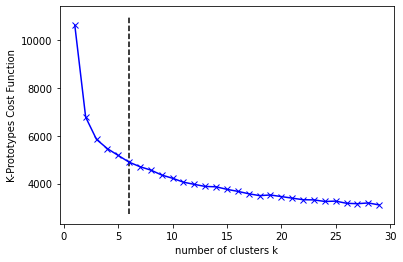

In [23]:
#Elbow curve to find optimal K

kn_kproto = KneeLocator(num_clusters_kproto, cost_kproto, curve='convex', direction='decreasing')

plt.xlabel('number of clusters k')
plt.ylabel('K-Prototypes Cost Function')
plt.plot(num_clusters_kproto, cost_kproto, 'bx-')
plt.vlines(kn_kproto.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

optimal_clusters_kproto = kn_kproto.knee

print(f"Thus, we find out that the optimal number of clusters is {optimal_clusters_kproto}, and the corresponding cost is {cost_kproto[optimal_clusters_kproto-1]}")

In [20]:
#Training model for K=(Optimal number of clusters)

kproto = KPrototypes(n_clusters=optimal_clusters_kproto, init = "random", verbose=0, random_state = 0)
clusters = kproto.fit_predict(df_kproto, categorical = [1,2,3])

In [27]:
# Printing out the cluster centroids
num_samples_clusters = []
for i in set(clusters):
  num_samples_clusters.append(list(clusters).count(i))
  
cols = ["AGE", "Occupation", "CategoryAnnual", "IncomeCategory"]
index = [f'Cluster {i}' for i in range(optimal_clusters_kproto)]

cluster_centroids_df = pd.DataFrame(kproto.cluster_centroids_, columns = cols, index = index)
cluster_centroids_df.insert(0, "NumData", num_samples_clusters, True)
display(cluster_centroids_df)

,NumData,AGE,Occupation,CategoryAnnual,IncomeCategory
Cluster 0,831,-0.3778234710675814,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE
Cluster 1,899,0.028614654062942318,ENGINEERING,BELOW $30 K,ACTIVE
Cluster 2,1049,1.4492153937577696,DIRECTORS/CEO/EXECUTIVES,BELOW $30 K,ACTIVE
Cluster 3,1122,0.5237107906952523,MANAGERS/SPECIALISTS/EXECUTIVES/DESIGNERS/OFFI...,$30 K TO $60 K,ACTIVE
Cluster 4,816,-0.9307141111939577,DEFENCE/CIVIL SERVICE,$30 K TO $60 K,ACTIVE
Cluster 5,801,-1.3234968914146008,MANAGERS/SPECIALISTS/EXECUTIVES/DESIGNERS/OFFI...,BELOW $30 K,ACTIVE


In [31]:
#Creating the final dataframe and exporting to excel
df_clusters_kproto = df_kproto.copy()

df_clusters_kproto.insert(4, "Cluster", clusters, True)

df_clusters_kproto = df_clusters_kproto.drop(columns=['AGE'])
df_clusters_kproto.insert(0, "AGE", df_main["AGE"], True)

display(df_clusters_kproto)
df_clusters_kproto.to_excel("Clustered Dataset.xlsx")  

,AGE,OccupationCategory,AnnualIncome,Category,Cluster
0,18,OTHERS,BELOW $30 K,ACTIVE,5
1,18,STUDENTS/NATIONAL SERVICE,BELOW $30 K,ACTIVE,5
2,19,ACCOUNTING/FINANCE/BANKING,BELOW $30 K,ACTIVE,5
3,19,DISTRIBUTION/ADMIN/MARKETING/HR,BELOW $30 K,ACTIVE,5
4,19,OTHERS,$100 K TO $300 K,ACTIVE,5
...,...,...,...,...,...
5513,96,RETIREE/UNEMPLOYED,BELOW $30 K,ACTIVE,2
5514,97,HOME MAKERS,BELOW $30 K,VERY ACTIVE,2
5515,98,HOME MAKERS,BELOW $30 K,ACTIVE,2
5516,111,ACCOUNTING/FINANCE/BANKING,$100 K TO $300 K,ACTIVE,2


## Final Clusters Visualized Using 3-D Plot

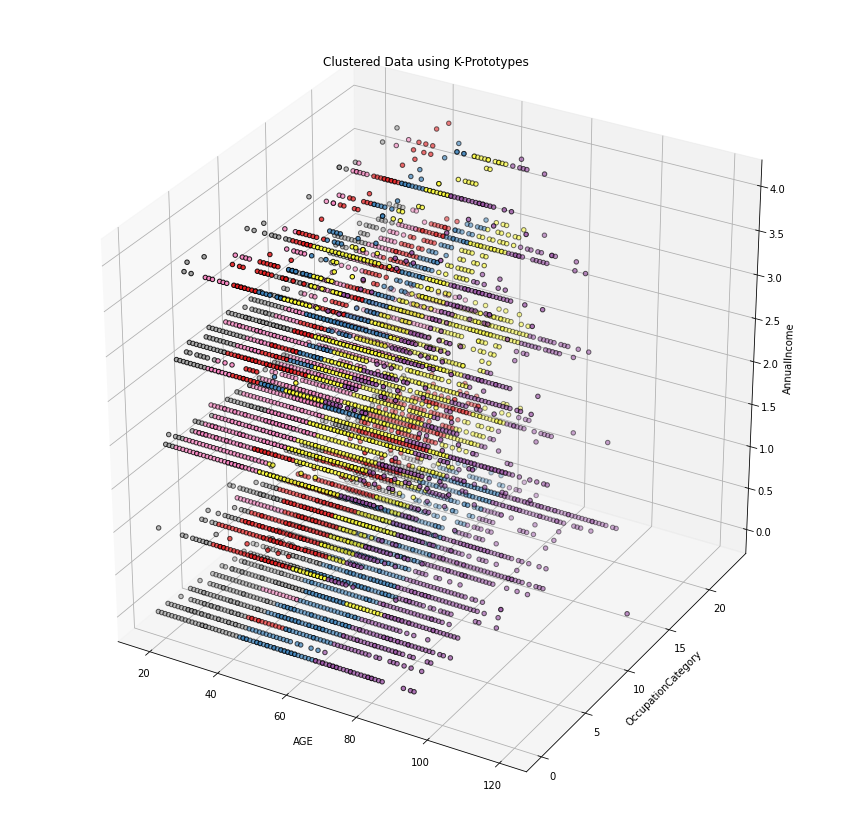

In [53]:
df_encoded = df_clusters_kproto.copy()
df_encoded['OccupationCategory'] = pd.factorize(df_encoded['OccupationCategory'])[0]
df_encoded['AnnualIncome'] = pd.factorize(df_encoded['AnnualIncome'])[0]
df_encoded['Category'] = pd.factorize(df_encoded['Category'])[0]

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

ax.scatter(df_encoded["AGE"], df_encoded["OccupationCategory"], df_encoded["AnnualIncome"], c=df_encoded["Cluster"],  cmap=plt.cm.Set1, edgecolor="k")

ax.set_xlabel('AGE')
ax.set_ylabel('OccupationCategory')
ax.set_zlabel('AnnualIncome')

plt.title('Clustered Data using K-Prototypes')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text major ticklabel objects>)

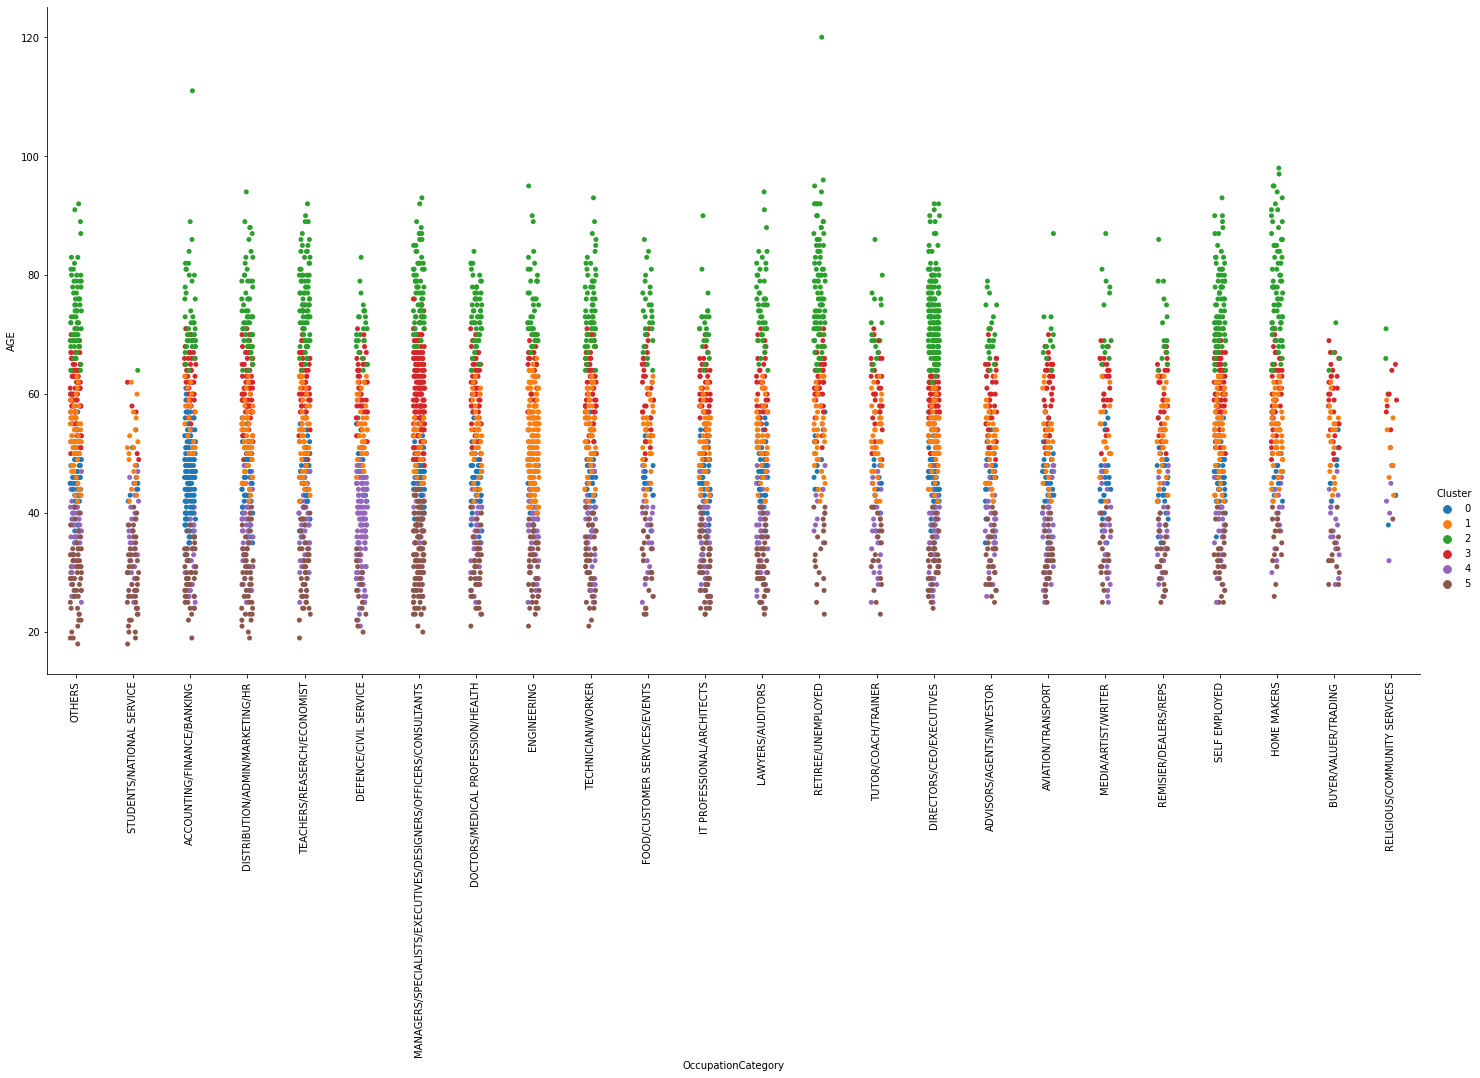

In [55]:
#Occupation VS Age VS Cluster GRAPH
sns.catplot(x="OccupationCategory", y="AGE", hue="Cluster", data=df_clusters_kproto, height=10, aspect=20/10)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

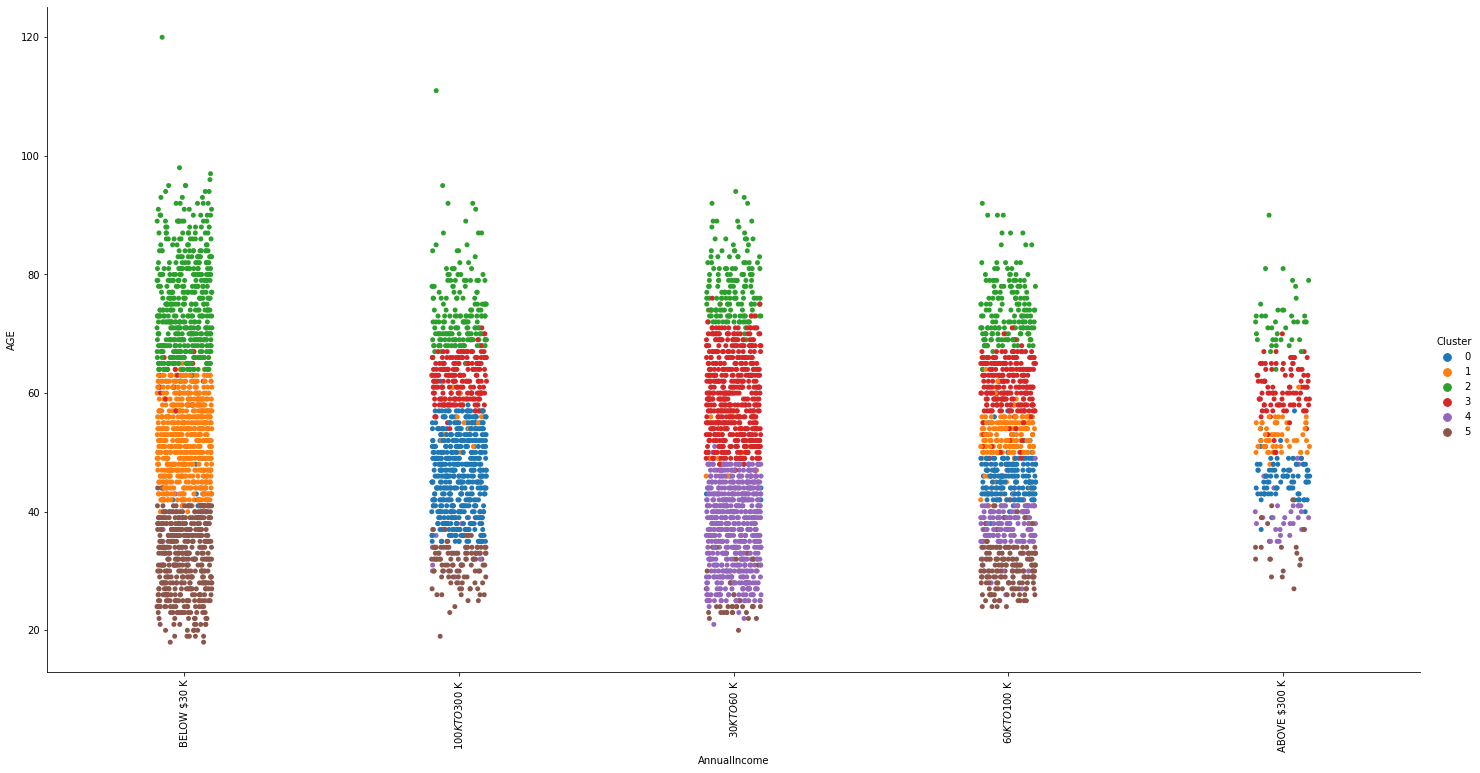

In [56]:
#ANNUAL INCOME VS Age VS Cluster GRAPH
sns.catplot(x="AnnualIncome", y="AGE", hue="Cluster", data=df_clusters_kproto, height=10, aspect=20/10)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

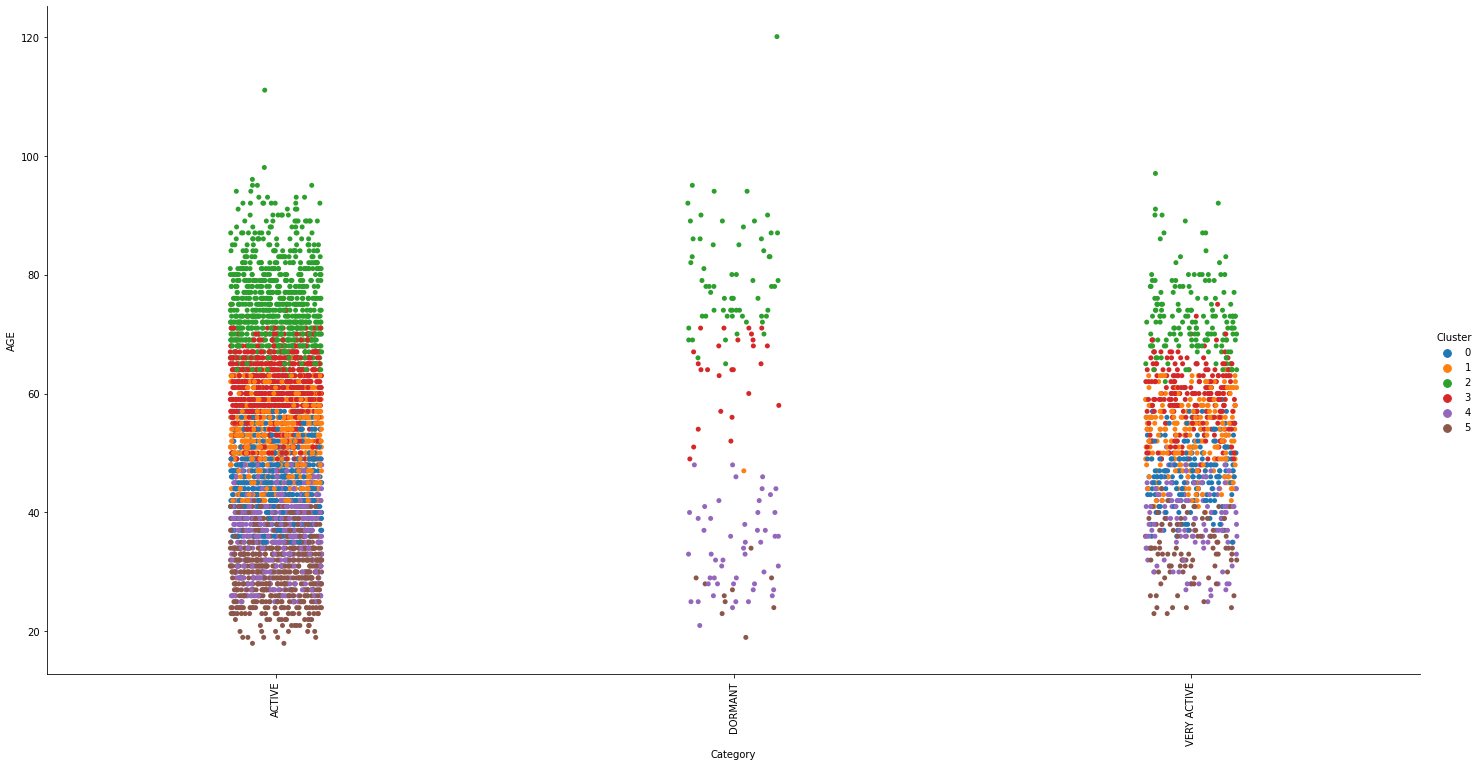

In [57]:
#Category VS Age VS Cluster GRAPH
sns.catplot(x="Category", y="AGE", hue="Cluster", data=df_clusters_kproto, height=10, aspect=20/10)
plt.xticks(rotation=90)